<h1>Linear Regression </h1>   

Read more at https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.datasets as ds

<H1>Read Data from CSV

In [5]:
#dfTrain = pd.read_csv('../input/LinearRegressionDS/LinearRegressionTrainingData.csv')   #Training Dataset

import requests
import io
url="https://manmohan291.s3.ap-south-1.amazonaws.com/LinearRegressionDS/LinearRegressionTrainingData.csv"
s=requests.get(url).content
dfTrain=pd.read_csv(io.StringIO(s.decode('utf-8')))



In [6]:
dfTrain.head()

,X,Y
0,-15.936758,2.134311
1,-29.152979,1.173257
2,36.189549,34.359109
3,37.492187,36.837955
4,-48.058829,2.808965


<h5> Visualize Data

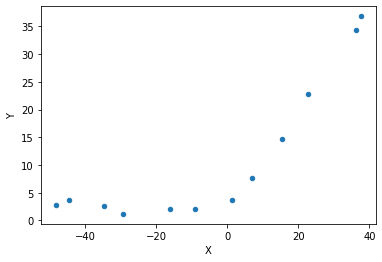

In [8]:
dfTrain.plot(x='X',y='Y',kind='scatter')
plt.show()

# Training

In [10]:
import sklearn.linear_model  as LR


df_Features=dfTrain.iloc[:,0:1]
df_Label=dfTrain.iloc[:,1:2]

X=df_Features.values

Y=df_Label.values

RegObj=LR.LinearRegression(normalize=True).fit(X,Y)

# Predict

In [11]:
RegObj.predict([[5]])

array([[14.92679966]])

# Plotting

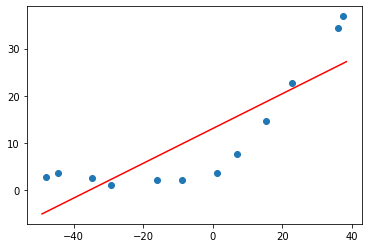

In [12]:
plt.scatter(X,Y) 
x_min, x_max = X[:, 0].min()-1 , X[:, 0].max()+1 
u = np.linspace(x_min, x_max, 100)

u.shape=(len(u),1)
newx=u
newy=RegObj.predict(newx)

plt.plot(newx,newy,color='r') 
plt.show()

# RMSE Evaluation

In [13]:
from sklearn.metrics import mean_squared_error
pY=RegObj.predict(X)
mse=mean_squared_error(Y, pY)
rmse=np.sqrt(mse)
print("RMSE={0:.2f}".format(rmse))

RMSE=6.69


# Implement your own RMSE

In [14]:
def getRMSE(aY,pY):
    Error=aY- pY
    ErrorSqr=Error**2
    MSE=ErrorSqr.mean()
    RMSE=np.sqrt(MSE)
    return RMSE

<h5>RMSE on Training Data

In [15]:
pY=RegObj.predict(X)
rmse=getRMSE(Y, pY)
print("RMSE={0:.2f}".format(rmse))

RMSE=6.69
